In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers
import numpy as np

In [70]:
from sklearn import preprocessing

In [1]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from data_io import read_as_df
import numpy as np
from matplotlib import pyplot as plt
from data_manager import DataManager

In [83]:
# plot curves of loss and accurary during training
def plot_loss_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [20]:
data_dir = 'sample_data'
data_name = 'microscopy'
data = read_as_df(data_dir  + '/' + data_name) 

Reading sample_data/microscopy_train from AutoML format
Number of examples = 500
Number of features = 4800
      Class
0  negative
1  positive
Number of classes = 2


In [118]:
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /home/aux/starting_kit/sample_data/microscopy_public.info
DataManager : microscopy
info:
	usage = Sample dataset Microscopy data
	name = microscopy
	task = binary.classification
	target_type = Numerical
	feat_type = Numerical
	metric = auc_binary
	time_budget = 1200
	feat_num = 4800
	target_num = 1
	label_num = 1
	train_num = 100
	valid_num = 500
	test_num = 500
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(500, 4800)
	Y_train = array(500,)
	X_valid = array(500, 4800)
	Y_valid = array(500,)
	X_test = array(500, 4800)
	Y_test = array(500,)
feat_type:	array(4800,)
feat_idx:	array(0,)



In [86]:
x_train = D.data['X_train']
y_train = D.data['Y_train']
x_valid = D.data['X_valid']
y_valid = D.data['Y_valid']

In [90]:
x_train = x_train.reshape((len(x_train), 40,40,3))
x_valid = x_valid.reshape((len(x_valid), 40,40,3))

In [102]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,)


In [75]:
"""label_enc = preprocessing.LabelEncoder()
target = label_enc.fit_transform(data.target)
"""

In [103]:
train_generator = train_datagen.flow(x_train, y=y_train, batch_size=10)
valid_generator = valid_datagen.flow(x_valid, y=y_valid, batch_size=10)
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 40, 40, 3)
labels batch shape: (10,)


In [107]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(40, 40, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [108]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 38, 38, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [109]:


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=50, epochs=20,
                              validation_data=valid_generator, validation_steps=50)

Epoch 1/20
50/50 [==============================] - 4s 76ms/step - loss: 0.7018 - acc: 0.5020 - val_loss: 11.9871 - val_acc: 0.5640
Epoch 2/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6898 - acc: 0.5240 - val_loss: 7.1436 - val_acc: 0.4400
Epoch 3/20
50/50 [==============================] - 2s 37ms/step - loss: 0.6902 - acc: 0.5200 - val_loss: 30.3809 - val_acc: 0.5640
Epoch 4/20
50/50 [==============================] - 2s 41ms/step - loss: 0.6817 - acc: 0.5700 - val_loss: 53.7972 - val_acc: 0.5640
Epoch 5/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6824 - acc: 0.5840 - val_loss: 42.8726 - val_acc: 0.5680
Epoch 6/20
50/50 [==============================] - 2s 39ms/step - loss: 0.6779 - acc: 0.5380 - val_loss: 64.4539 - val_acc: 0.5680
Epoch 7/20
50/50 [==============================] - 2s 38ms/step - loss: 0.6795 - acc: 0.5500 - val_loss: 13.5756 - val_acc: 0.6440
Epoch 8/20
50/50 [==============================] - 2s 43ms/step - loss: 0.67

In [34]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(40,40,3))

58892288/58889256 [==============================] - 4s 0us/step


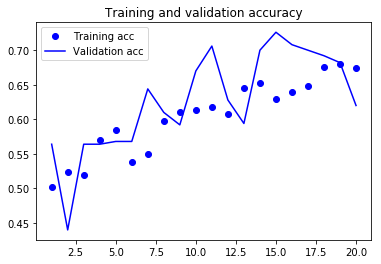

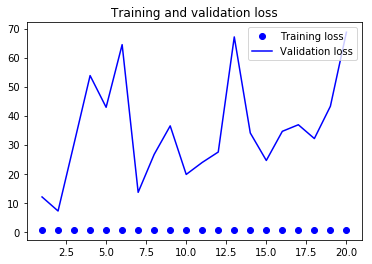

In [110]:
plot_loss_acc(history)

In [115]:
batch_size=10
def extract_features(generator, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = generator
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_generator, 500)
validation_features, validation_labels = extract_features(valid_generator, 500)

# flatten extracted features to be able to feed them to a densely connected layer
train_features = np.reshape(train_features, (500, 4*4*512))
validation_features = np.reshape(validation_features, (500, 4* 4*512))

In [116]:
# define and train densely connected classifier
model_p1 = models.Sequential()
model_p1.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model_p1.add(layers.Dropout(0.5))
model_p1.add(layers.Dense(1, activation='sigmoid'))

model_p1.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                 loss='binary_crossentropy',
                 metrics=['acc'])

history_p1 = model_p1.fit(train_features, train_labels, epochs=30,
                          batch_size=20,
                          validation_data=(validation_features, validation_labels))


Train on 500 samples, validate on 500 samples
Epoch 1/30
500/500 [==============================] - 1s 2ms/sample - loss: 0.6989 - acc: 0.5820 - val_loss: 1.8557 - val_acc: 0.4900
Epoch 2/30
500/500 [==============================] - 1s 1ms/sample - loss: 0.6531 - acc: 0.6220 - val_loss: 0.5468 - val_acc: 0.7700
Epoch 3/30
500/500 [==============================] - 1s 2ms/sample - loss: 0.6115 - acc: 0.6580 - val_loss: 0.4274 - val_acc: 0.8620
Epoch 4/30
500/500 [==============================] - 1s 1ms/sample - loss: 0.5473 - acc: 0.7340 - val_loss: 0.6110 - val_acc: 0.8280
Epoch 5/30
500/500 [==============================] - 1s 2ms/sample - loss: 0.5395 - acc: 0.7560 - val_loss: 0.3729 - val_acc: 0.9200
Epoch 6/30
500/500 [==============================] - 1s 2ms/sample - loss: 0.5118 - acc: 0.7780 - val_loss: 0.4586 - val_acc: 0.9160
Epoch 7/30
500/500 [==============================] - 1s 2ms/sample - loss: 0.4870 - acc: 0.8360 - val_loss: 0.5745 - val_acc: 0.9120
Epoch 8/30
500/5

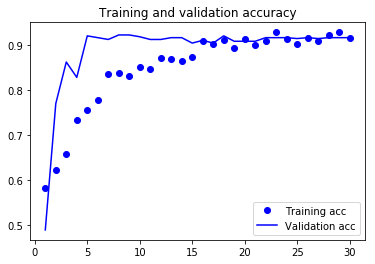

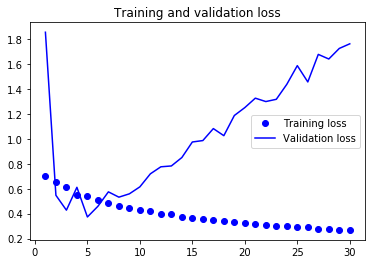

In [117]:
plot_loss_acc(history_p1)

In [122]:
model_p1.predict_proba(x_train)

ValueError: Error when checking input: expected dense_16_input to have 2 dimensions, but got array with shape (500, 40, 40, 3)